In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving credtrain_.csv to credtrain_.csv


In [ ]:
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

data_train = pd.read_csv('credtrain_.csv', sep=',', names=headers, skiprows=1)
#data_test = pd.read_csv('/content/credtest.csv', sep=',', header=None, names=headers)

In [ ]:
data_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


ESCT Estado civil Categorica 0,1,2,3

NDEP Numero de dependentes Categorica 0,1,2,3,4,5,6,7

RENDA Renda Familiar Numerica 300-9675

TIPOR Tipo de residencia Categorica 0,1

VBEM Valor do bem a ser adquirido Numerica 300-6000

NPARC Numero de parcelas Numerica 1-24

VPARC Valor da parcela Numerica 50-719

TEL Se o cliente possui telefone Categorica 0,1

IDADE Idade do cliente Numerica 18-70

RESMS Tempo de moradia (em meses) Numerica 0-420

ENTRADA Valor da entrada Numerica 0-1300

CLASSE = 1 se o cliente pagou a dıvida Categorica 0,1


A matriz x_train e chamada a matriz de treinamento.

 Ja a matriz y_train chamada a matriz de alvo

In [ ]:
#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data_train.iloc[:, 0:11])
y_train_ = np.array(data_train['CLASSE'])

## Função para fatiamento dos conjuntos de dados

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, #Conjuntos de dados
                                                  train_size=0.8,     #Tamanho da fatia de treinamento
                                                  )

In [ ]:
print(data_train.head(),
      X_train[0],
      y_train[0],
      sep='\n\n')

   ESCT  NDEP  RENDA  TIPOR  VBEM  NPARC  VPARC  TEL  IDADE  RESMS  ENTRADA  \
0     1     0    360      0   313      9     52    0     25     48        0   
1     0     0    350      1   468     10     65    0     33      6        0   
2     0     0   1100      0   829      9    125    0     56     48        0   
3     0     0   3000      0   552     12     76    1     31     60        0   
4     1     0   1000      0   809     12    111    0     24      7        0   

   CLASSE  
0       1  
1       1  
2       1  
3       1  
4       1  

[   0    0 4842    1  567   10   78    0   45    6    0]

0


In [ ]:
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


#**Treinando** um modelo

In [ ]:
#Importando o algoritmo que será usado como base


In [ ]:
#Criação do modelo
modelo = DecisionTreeClassifier(max_depth=3)

In [ ]:
#Treinamento do modelo
modelo.fit(X_train,
           y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
X_val[:5]

array([[   1,    0,  600,    0,  479,    6,  108,    0,   21,    0,    0],
       [   1,    0,  480,    0,  398,   10,   61,    0,   23,    0,    0],
       [   1,    0,  324,    1,  780,    5,   92,    0,   41,    6,  400],
       [   0,    0,  800,    1,  490,   12,   67,    0,   33,    0,    0],
       [   0,    0, 1690,    0, 1974,    6,  285,    0,   52,   48,  600]])

## **Aplicando o Treinamento**

In [ ]:
#Predição no conjunto de validação
y_val_pred = modelo.predict(X_val)

In [ ]:
#Visualização das primeiras 10 observações preditas
y_val_pred[:10]


array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
y_val[:10]

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Matriz de confusão
confusion_matrix(y_val, y_val_pred)

array([[156,   1],
       [ 34, 109]])

In [ ]:
#Organização dos dados para visualização da matriz
cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()

#Reorganização da matriz confusão para
cm_reorganizada = np.array([[tp, fn], [fp, tn]])
cm_reorganizada

'''
   +     -
+ 109   34

-  1    156
'''

'\n   +     -    \n+ 114   23\n\n-  4    160\n'

Text(1.3, 1.5, 'TN')

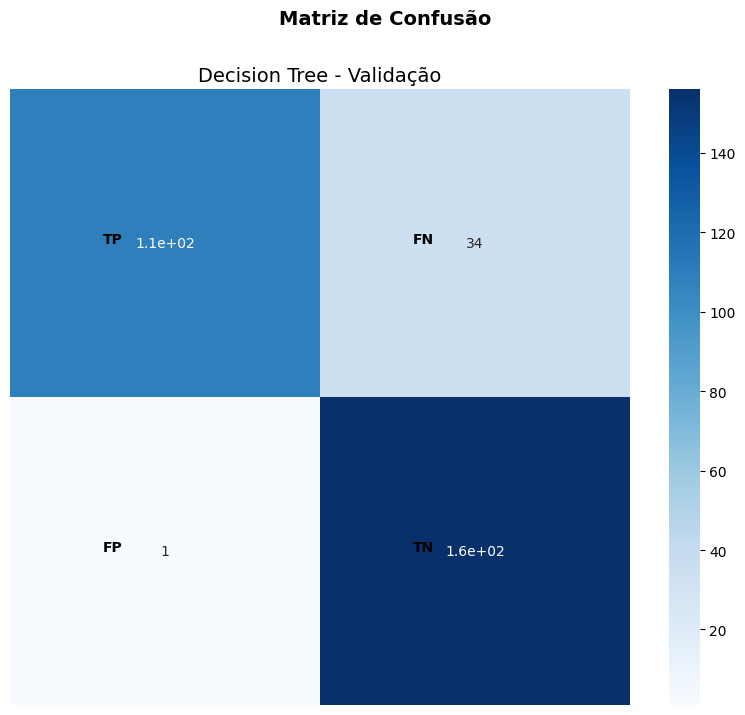

In [ ]:
#Visualização Gráfica da Matriz de Confusão
modelo_title = 'Decision Tree - Validação'
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

In [ ]:
#Visualizaçaõ do relatório de classificação
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       157
           1       0.99      0.76      0.86       143

    accuracy                           0.88       300
   macro avg       0.91      0.88      0.88       300
weighted avg       0.90      0.88      0.88       300

